# Loading tweets file

In [2]:
import pandas as pd
tw_pckl = pd.read_pickle('apple_tw_17-22.plk')
tw_pckl_df=pd.DataFrame(tw_pckl)
tw_pckl_df.shape,tw_pckl_df.head()

((5434783, 2),
                                              tw_text               tw_raw_time
 0  RT @alex: 30% is too much $AAPL \n\nppl are bo... 2021-04-20 23:59:42+00:00
 1  $AAPL NEW ARTICLE : Apple event fails to save ... 2021-04-20 23:59:03+00:00
 2  Apple in 2000 - 2010 - Launches revolutionary ... 2021-04-20 23:56:58+00:00
 3  RT @US_Research_Lab: Apple新イベント、4月21日2:00～\n$A... 2021-04-20 23:56:10+00:00
 4  @WOLF_Financial @InvestmentTalkk @caleb_invest... 2021-04-20 23:55:56+00:00)

In [3]:
#creating a new date column to store date
tw_pckl_df['date'] = pd.to_datetime(tw_pckl_df['tw_raw_time']).dt.date

In [4]:
tw_pckl_df.head()

,tw_text,tw_raw_time,date
0,RT @alex: 30% is too much $AAPL \n\nppl are bo...,2021-04-20 23:59:42+00:00,2021-04-20
1,$AAPL NEW ARTICLE : Apple event fails to save ...,2021-04-20 23:59:03+00:00,2021-04-20
2,Apple in 2000 - 2010 - Launches revolutionary ...,2021-04-20 23:56:58+00:00,2021-04-20
3,RT @US_Research_Lab: Apple新イベント、4月21日2:00～\n$A...,2021-04-20 23:56:10+00:00,2021-04-20
4,@WOLF_Financial @InvestmentTalkk @caleb_invest...,2021-04-20 23:55:56+00:00,2021-04-20


# Cleaning tweets

In [5]:
import re
def text_clean(data): 
    #cleans the data and converts number to POSNUM or NEGNUM
    p='POSNUM'
    n='NEGNUM'
    data = data.lower()
    data = re.sub(r"what's", "what is ", data)
    data = re.sub(r"\'s", " is ", data)
    data = re.sub(r"\'d"," would ",data)
    data = re.sub(r"\'ve", " have ", data)
    data = re.sub(r"\'ll", " will ", data)
    data = re.sub(r"\'re", " are ", data)
    data = re.sub(r"can't", "cannot ", data)
    data = re.sub(r"n't", " not ", data)
    data = re.sub(r"i'm", "i am ", data)
    data = re.sub(r'-\d*\.?\d',n,data)
    data = re.sub(r'\d*\.?\d',p,data)
    data = re.sub('[^A-Za-z0-9 ]+', '', data)
    data = data.strip()
    
    return data

Creating tokens

In [6]:
from nltk.tokenize import RegexpTokenizer
regtokenizer = RegexpTokenizer(r'\w+')
def tokenize(x): 
    #generates tokens
    return regtokenizer.tokenize(x)

Removing stopwords

In [7]:
from nltk.corpus import stopwords
def stopwords_removal(tokens):
    #removes top words
    final_sentence=[]
    stopwords_list=stopwords.words('english')
    for w in tokens:
        if w not in stopwords_list:
            final_sentence.append(w)
    return final_sentence

In [8]:
from nltk.stem import WordNetLemmatizer
def wlemmatizer(x):
    #lemmatizes words
    lemm=WordNetLemmatizer()
    return ' '.join(lemm.lemmatize(w) for w in x)

In [9]:
#first clean the data
tw_pckl_df["tw_text"]=tw_pckl_df["tw_text"].map(text_clean)
#then get tokens
tw_pckl_df["tokens"]=tw_pckl_df["tw_text"].map(tokenize)
#then remove stopwords
tw_pckl_df["tokens"]=tw_pckl_df["tokens"].map(stopwords_removal)
#then lemmatize
tw_pckl_df["lemmatized"]=tw_pckl_df["tokens"].map(wlemmatizer)

In [10]:
tw_pckl_df.head()

,tw_text,tw_raw_time,date,tokens,lemmatized
0,rt alex POSNUM is too much aapl ppl are bounci...,2021-04-20 23:59:42+00:00,2021-04-20,"[rt, alex, POSNUM, much, aapl, ppl, bouncing, ...",rt alex POSNUM much aapl ppl bouncing substack...
1,aapl new article apple event fails to save th...,2021-04-20 23:59:03+00:00,2021-04-20,"[aapl, new, article, apple, event, fails, save...",aapl new article apple event fails save compan...
2,apple in POSNUM POSNUM launches revolutionar...,2021-04-20 23:56:58+00:00,2021-04-20,"[apple, POSNUM, POSNUM, launches, revolutionar...",apple POSNUM POSNUM launch revolutionary groun...
3,rt usresearchlab applePOSNUMPOSNUMPOSNUMPOSNUM...,2021-04-20 23:56:10+00:00,2021-04-20,"[rt, usresearchlab, applePOSNUMPOSNUMPOSNUMPOS...",rt usresearchlab applePOSNUMPOSNUMPOSNUMPOSNUM...
4,wolffinancial investmenttalkk calebinvesttml b...,2021-04-20 23:55:56+00:00,2021-04-20,"[wolffinancial, investmenttalkk, calebinvesttm...",wolffinancial investmenttalkk calebinvesttml b...


In [11]:
# joining all tweets into single string
all_words_str = ' '.join([tweet for tweet in tw_pckl_df.lemmatized])

In [12]:
# making list of all words
all_words_list = all_words_str.split()

In [13]:
import nltk
from wordcloud import WordCloud
word_freq = nltk.FreqDist(all_words_list)

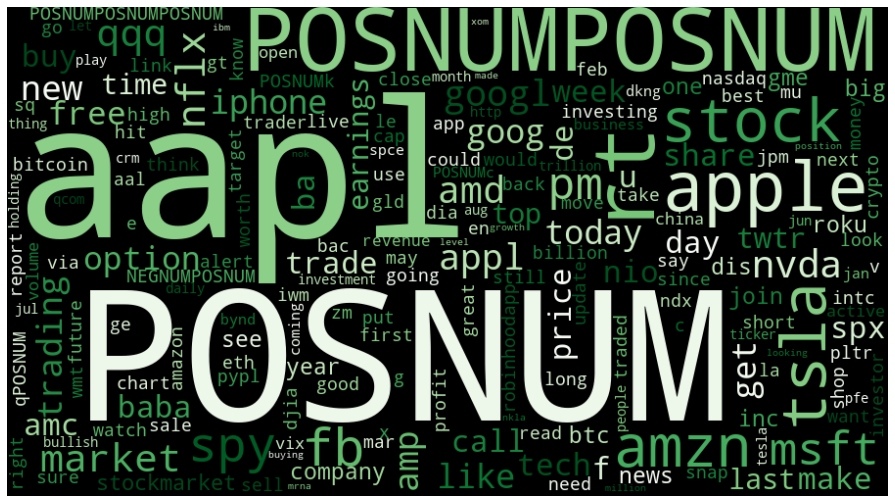

In [17]:
# Ref https://stackoverflow.com/questions/38465478/wordcloud-from-data-frame-with-frequency-python
#generate word cloud with frequncy
import matplotlib.pyplot as plt
word_cloud = WordCloud(width=900,
                       height=500,
                       colormap='Greens_r',
                       normalize_plurals=True).generate_from_frequencies(word_freq)
plt.figure(figsize=(16,9))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
apl_tweets_df=tw_pckl_df[['date','lemmatized']]

In [19]:
apl_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5434783 entries, 0 to 1915977
Data columns (total 2 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   date        object
 1   lemmatized  object
dtypes: object(2)
memory usage: 124.4+ MB


In [20]:
apl_tweets_df.date = pd.to_datetime(apl_tweets_df.date)
apl_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5434783 entries, 0 to 1915977
Data columns (total 2 columns):
 #   Column      Dtype         
---  ------      -----         
 0   date        datetime64[ns]
 1   lemmatized  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 124.4+ MB


/Users/keerthiseetha/villanova/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [21]:
#calculate sentiment score for each tweet
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
def senti_analysis(data):
    #generates polarity score
    return(analyser.polarity_scores(data)["compound"])

In [22]:
apl_tweets_df["SentimentScore"] = apl_tweets_df["lemmatized"].apply(senti_analysis) 

/Users/keerthiseetha/villanova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
apl_tweets_df.head()

,date,lemmatized,SentimentScore
0,2021-04-20,rt alex POSNUM much aapl ppl bouncing substack...,0.0000
1,2021-04-20,aapl new article apple event fails save compan...,0.1027
2,2021-04-20,apple POSNUM POSNUM launch revolutionary groun...,0.7845
3,2021-04-20,rt usresearchlab applePOSNUMPOSNUMPOSNUMPOSNUM...,0.0000
4,2021-04-20,wolffinancial investmenttalkk calebinvesttml b...,0.0000


In [24]:
day_sent=apl_tweets_df.groupby('date')['SentimentScore'].mean().reset_index()

In [25]:
day_sent.head()

,date,SentimentScore
0,2017-01-01,0.109612
1,2017-01-02,0.118147
2,2017-01-03,0.097646
3,2017-01-04,0.088151
4,2017-01-05,0.084029


In [26]:
#dump result df into pickle and csv file
day_sent.to_pickle("processed_data/day_apl_tw_sent.pkl")
day_sent.to_csv("processed_data/day_apl_tw_sent.csv")